## Prediction of quality using unsupervised learning

### The dataset gives a set of red wine data with physicochemical (inputs) and sensory (output) variables. This datatset can be generally viewed as a classification task. The classes are ordered and not balanced.
### An unsupervised machine learning approach is used in order to analyse the data. Without the labels been provided, K-Means is used to understand the data through clustering methods.

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np

### The data is read from the file and the output parameter (quality) is dropped from the file.

In [103]:
data = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [104]:
data.head()

x = data.drop(columns=['quality'])
y = data['quality']
y=pd.get_dummies(pd.Series(y))
print(y[0:5])

   3  4  5  6  7  8
0  0  0  1  0  0  0
1  0  0  1  0  0  0
2  0  0  1  0  0  0
3  0  0  0  1  0  0
4  0  0  1  0  0  0


### The value of K is chosen from by plotting the elbow curve. K is taken as the point where the curve doesn't show a major change. The value of K gives the number of clusters to form and the number of centroids to generate.

In [105]:
Nc = range(2, 8)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='

/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


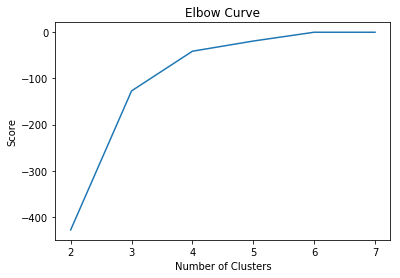

In [106]:
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

### The features have been separated into x & y variables by splitting. By a validation set, the model is tuned by checking if the model is underfit, overfit or well generalised.

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [108]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

x_train=x_train.values
x_train[:5]

array([[9.9000e+00, 5.4000e-01, 4.5000e-01, 2.3000e+00, 7.1000e-02,
        1.6000e+01, 4.0000e+01, 9.9910e-01, 3.3900e+00, 6.2000e-01,
        9.4000e+00],
       [1.0800e+01, 2.6000e-01, 4.5000e-01, 3.3000e+00, 6.0000e-02,
        2.0000e+01, 4.9000e+01, 9.9720e-01, 3.1300e+00, 5.4000e-01,
        9.6000e+00],
       [9.9000e+00, 3.5000e-01, 5.5000e-01, 2.1000e+00, 6.2000e-02,
        5.0000e+00, 1.4000e+01, 9.9710e-01, 3.2600e+00, 7.9000e-01,
        1.0600e+01],
       [5.6000e+00, 8.5000e-01, 5.0000e-02, 1.4000e+00, 4.5000e-02,
        1.2000e+01, 8.8000e+01, 9.9240e-01, 3.5600e+00, 8.2000e-01,
        1.2900e+01],
       [6.6000e+00, 7.2500e-01, 9.0000e-02, 5.5000e+00, 1.1700e-01,
        9.0000e+00, 1.7000e+01, 9.9655e-01, 3.3500e+00, 4.9000e-01,
        1.0800e+01]])

In [109]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(x_train)

In [110]:
labels = kmeans.labels_

labels

array([0, 0, 2, ..., 5, 0, 1], dtype=int32)

### The closest cluster in which each sample in x belongs to is given by 'predict' below.

In [111]:
x=x_test.values[0]
x_pred = kmeans.predict([x])

x_pred

array([3], dtype=int32)

### Fit method is used to train the model with the training set and compute K-Means clustering. Fit_predict is used to find cluster centers and predict cluster index for each sample given above.

In [114]:
# accuracy_score(y, y_kmeans)

In [112]:
kmeans.score(x_train, y=None)

-142640.57226375208

In [113]:
y_kmeans = kmeans.fit_predict(x_train)

y_kmeans

array([0, 0, 2, ..., 5, 0, 1], dtype=int32)

### Here, it is considered that since k-means is not a classification tool, thus analyzing accuracy is not a very good idea. K-Means clustering here is employed to find a grouping of data which maximizes between-clusters distances, and it does not use the labeling to train. It can be seen that the clustering algorithm demonstrates an overall positive correlation between the attributes of density, alcohol, sulfur dioxide with the quality index. It can be also noted that, this dataset can be effectively modelled through a classification analysis, there might be instances where relationships between data parameters will not be linear and K-Means can serve as a valuable tool in understanding the data through clustering methods.